In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/Shareddrives/AC297r Project - RFCx /code')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from specinput import wave_to_mel_spec, load_audio, params
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [ ]:
# Load audio data 
audio_path = '../audio_data/train/audio/p/Amazona_vittata/26375778_49.09-49.95.wav'
data, sample_rate = load_audio(audio_path)

In [ ]:
sample_rate

28000

### Noise injection

In [ ]:
def manipulate(data, noise_factor):
    # noize_factor random between 0.001 to 0.005
    noise_factor = np.random.uniform(0.001, 0.01)
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [ ]:

data_noise_injected = manipulate(data, noise_factor)

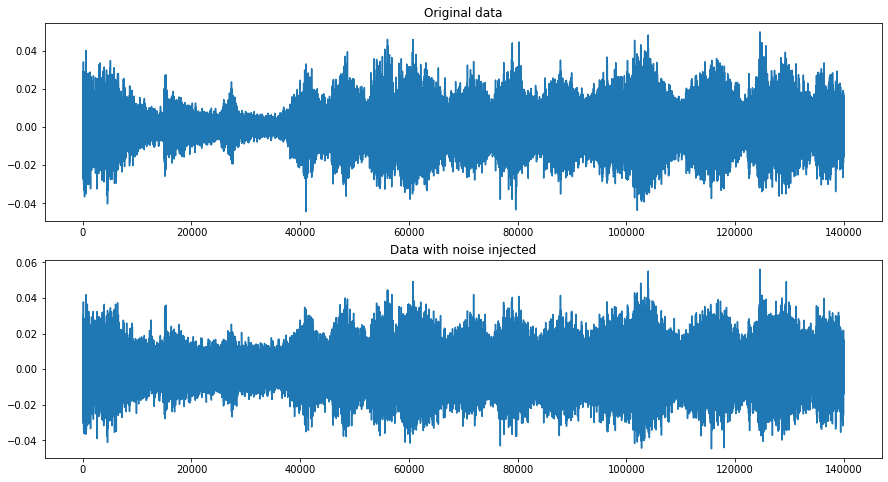

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(data)
axes[0].set_title("Original data")
axes[1].plot(data_noise_injected)
axes[1].set_title("Data with noise injected")

plt.show()

### Shifting time

In [ ]:
# @title old
# def shift_time(data, sampling_rate, shift_max, shift_direction):
#     shift = sampling_rate * shift_max # np.random.randint(
#     if shift_direction == 'right':
#         shift = -shift
#     elif shift_direction == 'both':
#         direction = np.random.randint(0, 2)
#         if direction == 1:
#             shift = -shift
#     print(shift)
#     augmented_data = np.roll(data, shift)
#     # Set to silence for heading/ tailing
#     if shift > 0:
#         augmented_data[:shift] = 0
#     else:
#         augmented_data[shift:] = 0
#     return augmented_data

In [ ]:
def shift_time(data, sampling_rate, shift_max):
    shift = int(np.round(sampling_rate * shift_max)) # np.random.randint(
    direction = np.random.randint(0, 2)
    if direction == 1:
        shift = -shift
    print(shift)
    augmented_data = np.roll(data, shift)
    return augmented_data

In [ ]:
shift_max = 0.5
data_time_shifted = shift_time(data, sample_rate, shift_max)

-14000


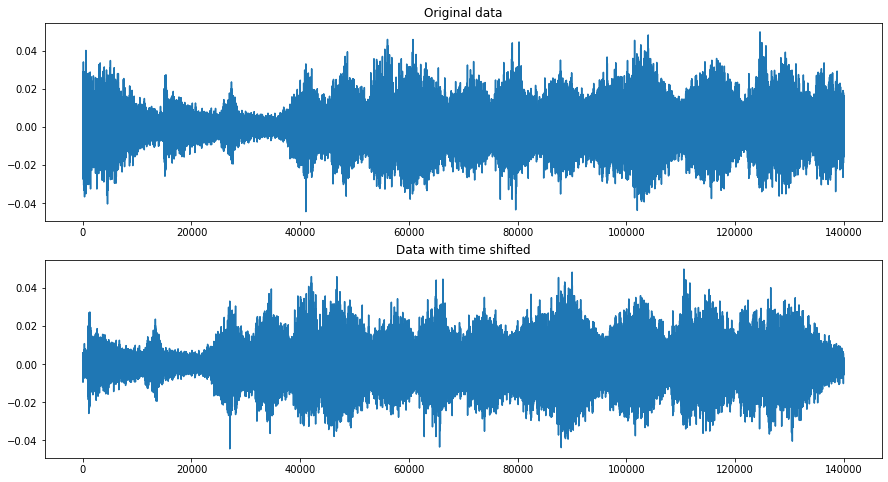

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(data)
axes[0].set_title("Original data")
axes[1].plot(data_time_shifted)
axes[1].set_title("Data with time shifted")

plt.show()

### Changing Pitch

In [ ]:
def change_pitch(data, sample_rate):
    n_step = - 3# np.random.uniform(-3,3)
    augmented_data = librosa.effects.pitch_shift(y=data, sr=sample_rate, n_steps=n_step)
    return augmented_data

In [ ]:
# pitch_factor = 1

data_change_pitch = change_pitch(data, sample_rate)

In [ ]:
# pip install soundfile
import soundfile

In [ ]:
soundfile.write('/content/drive/MyDrive/file_change_pitch_-3.wav', data_change_pitch, sample_rate)

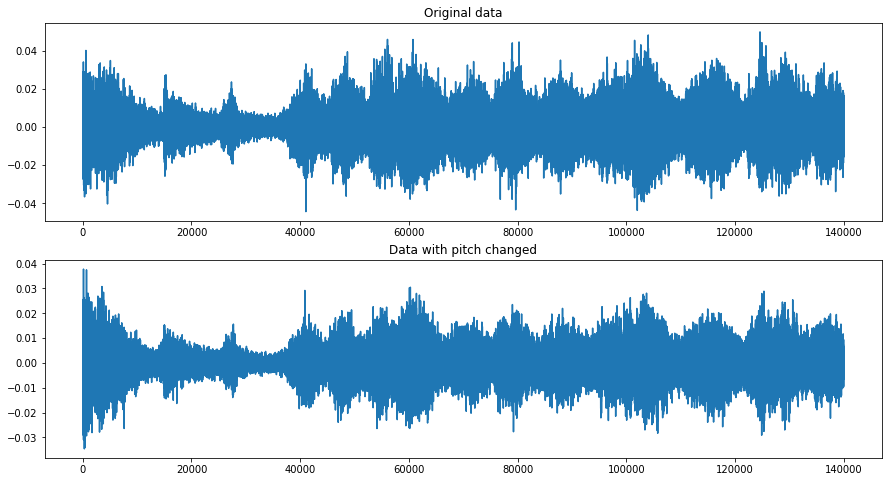

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(data)
axes[0].set_title("Original data")
axes[1].plot(data_change_pitch)
axes[1].set_title("Data with pitch changed")

plt.show()

### Changing speed

In [ ]:
speed_factor = 2

data_change_speed = librosa.effects.time_stretch(data, speed_factor)

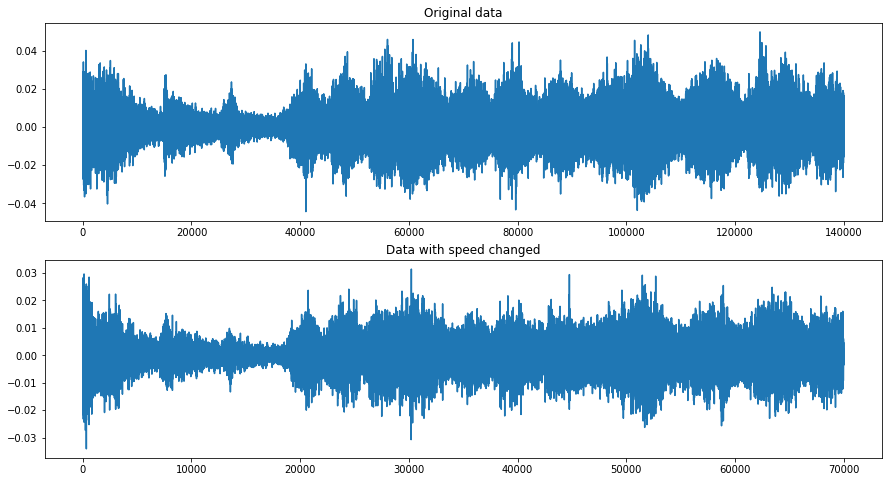

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(data)
axes[0].set_title("Original data")
axes[1].plot(data_change_speed)
axes[1].set_title("Data with speed changed")

plt.show()

In [ ]:
soundfile.write('/content/drive/MyDrive/file_change_speed_2.wav', data_change_speed, sample_rate)

# Streching

In [ ]:
input_length = len(data)
streching = data.copy()
streching = librosa.effects.time_stretch(streching.astype('float'), 1.1)
if len(streching) > input_length:
    streching = streching[:input_length]
else:
    streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")

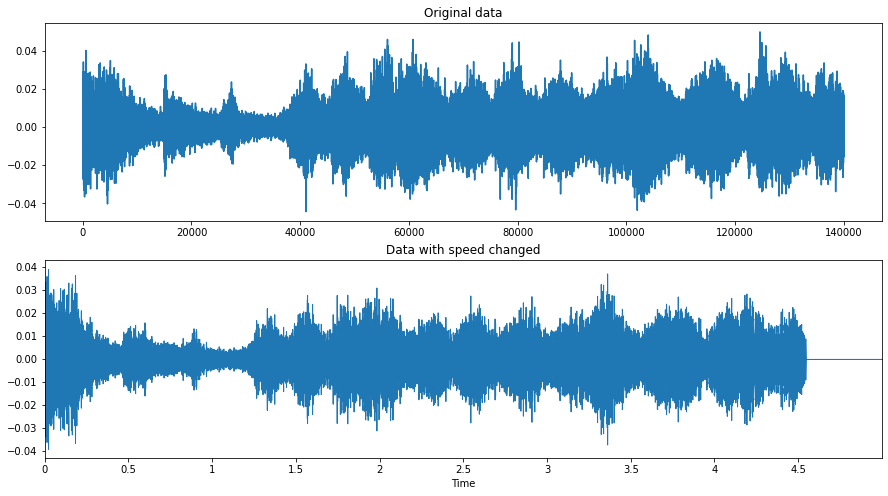

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(data)
axes[0].set_title("Original data")
librosa.display.waveplot(streching, sr=sample_rate)
axes[1].set_title("Data with speed changed")

plt.show()

# Random shifting

In [ ]:
y_shift = data.copy()
timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
print("timeshift_fac = ",timeshift_fac)
start = int(y_shift.shape[0] * timeshift_fac)
print(start)
if (start > 0):
    y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
else:
    y_shift = np.pad(y_shift,(0,-start),mode='constant')[0:y_shift.shape[0]]


timeshift_fac =  -0.027988229146929736
-3918


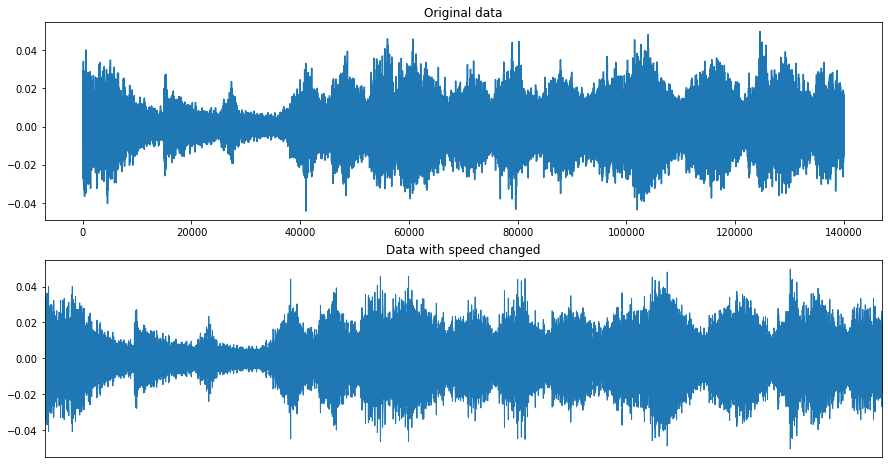

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(data)
axes[0].set_title("Original data")
librosa.display.waveplot(y_shift, sr=sample_rate,x_axis=None)
axes[1].set_title("Data with random time shifting")

plt.show()